<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.287579,93.201659,73.717321,69.330749,-0.000646,285.536663,285.537319,-0.000657
1,0.0,1.0,73.600363,97.219675,70.404173,75.735556,0.001841,326.961609,326.958343,0.003266
2,0.0,2.0,91.339962,89.587457,98.688189,63.990774,-0.004751,353.601630,353.605609,-0.003979
3,0.0,3.0,24.363394,66.545734,36.578584,36.434918,-0.000782,173.921849,173.928244,-0.006396
4,0.0,4.0,63.273703,80.654604,76.777429,93.864671,0.004315,324.574721,324.568979,0.005742
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,64.377897,43.745192,97.280042,56.721170,-0.000102,272.124199,272.128640,-0.004441
19996,999.0,16.0,92.798848,84.177846,20.415011,24.701017,-0.002240,232.090482,232.086504,0.003978
19997,999.0,17.0,21.404501,89.263965,90.484898,27.766027,0.004486,238.923876,238.924897,-0.001020
19998,999.0,18.0,26.858162,27.380943,58.075984,89.243482,0.047462,211.606033,211.568822,0.037210


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.287579,93.201659,73.717321,69.330749,-0.000646,285.536663,285.537319,-0.000657
1,0.0,1.0,73.600363,97.219675,70.404173,75.735556,0.001841,326.961609,326.958343,0.003266
2,0.0,2.0,91.339962,89.587457,98.688189,63.990774,-0.004751,353.601630,353.605609,-0.003979
3,0.0,3.0,24.363394,66.545734,36.578584,36.434918,-0.000782,173.921849,173.928244,-0.006396
4,0.0,4.0,63.273703,80.654604,76.777429,93.864671,0.004315,324.574721,324.568979,0.005742
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,64.377897,43.745192,97.280042,56.721170,-0.000102,272.124199,272.128640,-0.004441
19996,999.0,16.0,92.798848,84.177846,20.415011,24.701017,-0.002240,232.090482,232.086504,0.003978
19997,999.0,17.0,21.404501,89.263965,90.484898,27.766027,0.004486,238.923876,238.924897,-0.001020
19998,999.0,18.0,26.858162,27.380943,58.075984,89.243482,0.047462,211.606033,211.568822,0.037210


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.287579  93.201659  73.717321  69.330749 -0.000646  285.536663   
      1.0    73.600363  97.219675  70.404173  75.735556  0.001841  326.961609   
      2.0    91.339962  89.587457  98.688189  63.990774 -0.004751  353.601630   
      3.0    24.363394  66.545734  36.578584  36.434918 -0.000782  173.921849   
      4.0    63.273703  80.654604  76.777429  93.864671  0.004315  324.574721   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   64.377897  43.745192  97.280042  56.721170 -0.000102  272.124199   
      16.0   92.798848  84.177846  20.415011  24.701017 -0.002240  232.090482   
      17.0   21.404501  89.263965  90.484898  27.766027  0.004486  238.923876   
      18.0   26.858162  27.380943  58.075984  89.243482  0.047462  211.606033   
      19.0   86.616314  96.997351  29.227400  39.391150  0.005548  262.237764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    285.537319 -0.000657  
      1.0    326.958343  0.003266  
      2.0    353.605609 -0.003979  
      3.0    173.928244 -0.006396  
      4.0    324.568979  0.005742  
...                 ...       ...  
999.0 15.0   272.128640 -0.004441  
      16.0   232.086504  0.003978  
      17.0   238.924897 -0.001020  
      18.0   211.568822  0.037210  
      19.0   262.229741  0.008023  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.287579  93.201659  73.717321  69.330749 -0.000646  285.536663   
      1.0    73.600363  97.219675  70.404173  75.735556  0.001841  326.961609   
      2.0    91.339962  89.587457  98.688189  63.990774 -0.004751  353.601630   
      3.0    24.363394  66.545734  36.578584  36.434918 -0.000782  173.921849   
      4.0    63.273703  80.654604  76.777429  93.864671  0.004315  324.574721   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   64.377897  43.745192  97.280042  56.721170 -0.000102  272.124199   
      16.0   92.798848  84.177846  20.415011  24.701017 -0.002240  232.090482   
      17.0   21.404501  89.263965  90.484898  27.766027  0.004486  238.923876   
      18.0   26.858162  27.380943  58.075984  89.243482  0.047462  211.606033   
      19.0   86.616314  96.997351  29.227400  39.391150  0.005548  262.237764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    285.537319 -0.000657  
      1.0    326.958343  0.003266  
      2.0    353.605609 -0.003979  
      3.0    173.928244 -0.006396  
      4.0    324.568979  0.005742  
...                 ...       ...  
999.0 15.0   272.128640 -0.004441  
      16.0   232.086504  0.003978  
      17.0   238.924897 -0.001020  
      18.0   211.568822  0.037210  
      19.0   262.229741  0.008023  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.287579,93.201659,73.717321,69.330749,-0.000646,285.536663,285.537319,-0.000657
1,0.0,1.0,73.600363,97.219675,70.404173,75.735556,0.001841,326.961609,326.958343,0.003266
2,0.0,2.0,91.339962,89.587457,98.688189,63.990774,-0.004751,353.601630,353.605609,-0.003979
3,0.0,3.0,24.363394,66.545734,36.578584,36.434918,-0.000782,173.921849,173.928244,-0.006396
4,0.0,4.0,63.273703,80.654604,76.777429,93.864671,0.004315,324.574721,324.568979,0.005742
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,64.377897,43.745192,97.280042,56.721170,-0.000102,272.124199,272.128640,-0.004441
19996,999.0,16.0,92.798848,84.177846,20.415011,24.701017,-0.002240,232.090482,232.086504,0.003978
19997,999.0,17.0,21.404501,89.263965,90.484898,27.766027,0.004486,238.923876,238.924897,-0.001020
19998,999.0,18.0,26.858162,27.380943,58.075984,89.243482,0.047462,211.606033,211.568822,0.037210


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.287579  93.201659  73.717321  69.330749 -0.000646  285.536663   
      1.0    73.600363  97.219675  70.404173  75.735556  0.001841  326.961609   
      2.0    91.339962  89.587457  98.688189  63.990774 -0.004751  353.601630   
      3.0    24.363394  66.545734  36.578584  36.434918 -0.000782  173.921849   
      4.0    63.273703  80.654604  76.777429  93.864671  0.004315  324.574721   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   64.377897  43.745192  97.280042  56.721170 -0.000102  272.124199   
      16.0   92.798848  84.177846  20.415011  24.701017 -0.002240  232.090482   
      17.0   21.404501  89.263965  90.484898  27.766027  0.004486  238.923876   
      18.0   26.858162  27.380943  58.075984  89.243482  0.047462  211.606033   
      19.0   86.616314  96.997351  29.227400  39.391150  0.005548  262.237764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    285.537319 -0.000657  
      1.0    326.958343  0.003266  
      2.0    353.605609 -0.003979  
      3.0    173.928244 -0.006396  
      4.0    324.568979  0.005742  
...                 ...       ...  
999.0 15.0   272.128640 -0.004441  
      16.0   232.086504  0.003978  
      17.0   238.924897 -0.001020  
      18.0   211.568822  0.037210  
      19.0   262.229741  0.008023  

[20000 rows x 8 columns]

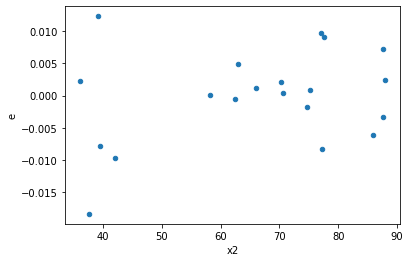

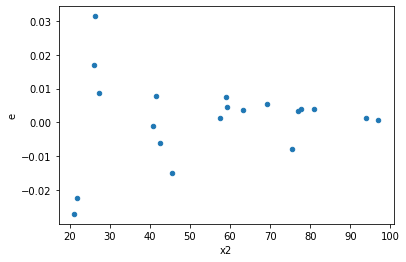

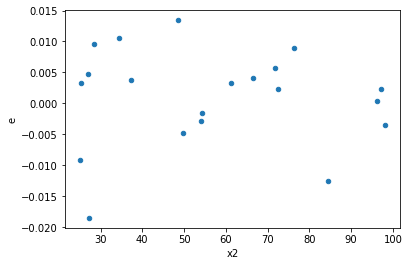

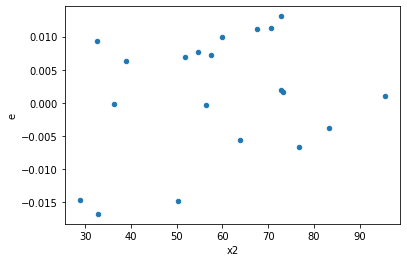

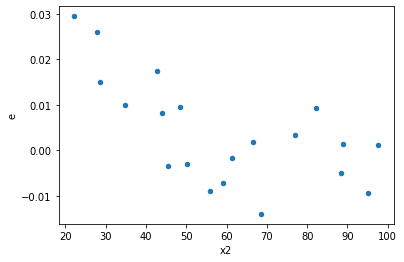

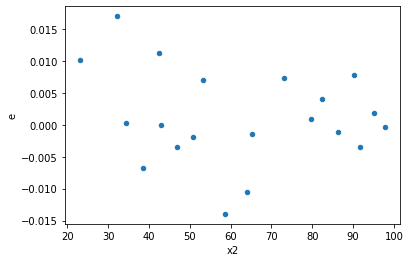

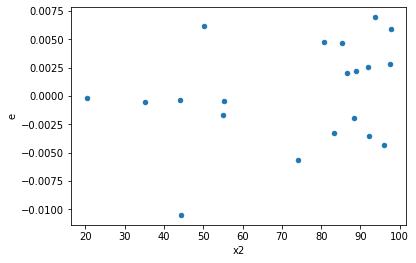

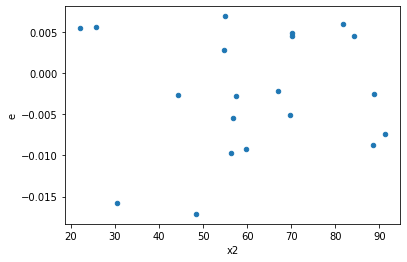

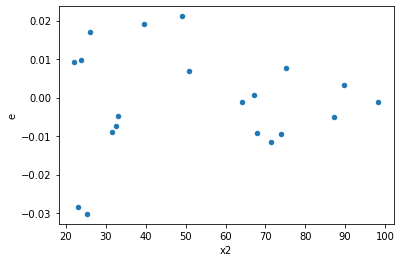

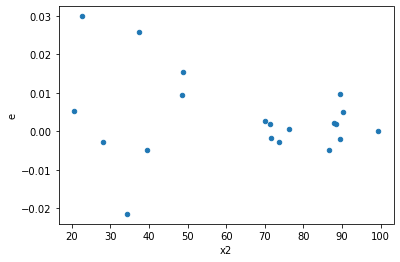

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,4.0,4.0,3.3998831706153786e-05,0.000247595728203436,8.499707926538446e-06,6.1898932050859e-05,7.282477537562598,0.08042417240532629,0.9597879137973369,0.040212086202663144,Reject005=1 : Homoscedasticity
9.0,4.0,4.0,0.0003147088074201806,0.00045491250421243555,7.867720185504515e-05,0.00011372812605310889,1.4455029331449987,0.7297643797841651,0.6351178101079175,0.36488218989208254,Reject005=1 : Homoscedasticity
10.0,4.0,4.0,8.517074894001396e-05,0.00011284466706719587,2.129268723500349e-05,2.8211166766798967e-05,1.3249227988669297,0.7917302770440151,0.6041348614779924,0.39586513852200755,Reject005=1 : Homoscedasticity
11.0,4.0,4.0,0.0002622865954042357,0.0004161125140165741,6.557164885105893e-05,0.00010402812850414352,1.5864802902918547,0.6657065034390368,0.6671467482804816,0.3328532517195184,Reject005=1 : Homoscedasticity
16.0,4.0,4.0,6.113876065798156e-05,7.776339912887056e-05,1.528469016449539e-05,1.944084978221764e-05,1.271916510769485,0.8213282930808301,0.589335853459585,0.41066414654041505,Reject005=1 : Homoscedasticity
19.0,4.0,4.0,0.00017973489492527963,0.00048639011991757555,4.493372373131991e-05,0.00012159752997939389,2.7061529711288412,0.3582460567540573,0.8208769716229714,0.17912302837702865,Reject005=1 : Homoscedasticity
22.0,4.0,4.0,2.1771970103896454e-05,0.00020445137708939112,5.442992525974113e-06,5.111284427234778e-05,9.390577706736845,0.05200835812663174,0.9739958209366841,0.02600417906331587,Reject005=1 : Homoscedasticity
23.0,4.0,4.0,7.779694095100807e-05,8.730443632780663e-05,1.9449235237752017e-05,2.1826109081951656e-05,1.1222091159443637,0.9137167764444896,0.5431416117777552,0.4568583882222448,Reject005=1 : Homoscedasticity
26.0,4.0,4.0,6.874331553326338e-05,0.00040795364044154156,1.7185828883315845e-05,0.00010198841011038539,5.934448131820784,0.11277929721147162,0.9436103513942642,0.05638964860573581,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.0005662551719446085,0.00021977637300749366,0.00014156379298615212,5.4944093251873414e-05,0.38812250006078947,0.38163074836400157,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,0.002633588072531684,0.00019399663473663542,0.000658397018132921,4.8499158684158855e-05,0.07366248228415817,0.026951040610831898,Reject005=0 : Heteroscedasticity
2.0,4.0,4.0,0.0003840383475957102,5.09262906947614e-05,9.600958689892755e-05,1.273157267369035e-05,0.1326073060505228,0.0758285550730651,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,3.3998831706153786e-05,0.000247595728203436,8.499707926538446e-06,6.1898932050859e-05,7.282477537562598,0.08042417240532629,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,0.0005017091355144341,9.367656738694579e-05,0.00012542728387860853,2.3419141846736448e-05,0.1867148926656344,0.13295110356929446,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,0.00040309338934889897,0.00036286155882119686,0.00010077334733722474,9.071538970529921e-05,0.9001922839948157,0.921284863427052,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,0.0005926559886268312,2.54088430067255e-06,0.0001481639971567078,6.352210751681375e-07,0.004287283600322194,0.00010903401125355347,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,0.0004319794899865654,6.348929493425077e-05,0.00010799487249664135,1.5872323733562693e-05,0.14697293831294003,0.09010279098036891,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,9.698405611470112e-05,5.88330885920277e-05,2.424601402867528e-05,1.4708272148006925e-05,0.6066263976673338,0.640072351000118,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      782
Reject005=0 : Heteroscedasticity    218
Name: Result_test, dtype: int64